# Занятие 5:
## Анализ данных: основы

### Ключевые библиотеки

Основные библиотеки Python для анализа данных это `numpy`, `scipy`, `pandas`, `matplotlib`. 
Все они составляют единую экосистему, с простым взаимодействием объектов и функций из разных библиотек между собой.

#### `numpy`
Костяком этой библиотеки является класс `numpy.ndarray` представляющий собой массив произвольной размерности и формы. 
Массивы `numpy` оптимизированы для векторных, т.е. массово-параллельных операций: простых действий выполняемых независимо над каждым элементом массива.
Покажем это на примере поэлементного сложения:

In [1]:
import numpy as np  # подключаем библиотеку numpy, в дальнейшем обращение к ней будет np
# создаём два обычных списка Python из тысячи случайных целых элементов. 
# функция np.random.randint(100) возвращает случайное целое число в диапазоне (0, 100)
l1 = [np.random.randint(100) for _ in range(1000)]
l2 = [np.random.randint(100) for _ in range(1000)]
lsum = [0] * len(l1) # cоздаём массив где будет храниться сумма
%timeit for i in range(len(lsum)): lsum[i] = l1[i] + l2[i]  # замеряем сколько времени занимает операция поэлементного сложения
# создаём массивы numpy a1, a2 из списков l1, l2 
a1 = np.array(l1)
a2 = np.array(l2)
%timeit asum = a1 + a2  # замеряем сколько времени занимает операция поэлементного сложения

59.5 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
852 ns ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


##### Создание `numpy`-массивов
Наиболее используемые способы их задания следующие:
- Из стандартных контейнеров Python (напр. `tuple`, `list`)
- Массивы заданной формы со всеми одинаковыми элементами (напр. `np.zeros`, `np.ones`)
- Диапазоны `np.arange`, `np.linspace`

In [6]:
import numpy as np
# создаём numpy-массив из списка:
l1 = [1, 2, 3]
a1 = np.array(l1)
print(a1)
# создаём numpy-массив из единиц заданной формы:
a2 = np.ones((2, 3))  # создаёт матрицу 2 на 3 
print(a2)

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]]


In [9]:
import numpy as np
# функция numpy.arange подобна функции range из стандартной библиотеки. отличие только в том что она сразу генерирует numpy-массив.
# в качестве аргументов передаются: начало диапазона, конец, шаг. Конец в последовательность не включён.
a3 = np.arange(1, 5, 1)
print(a3)
# аналогичной, но не такой же, является функция linspace. 
# в неё передаются начало диапазона, конец, количество элементов (расположенных равномерно между началом и концом)
a4 = np.linspace(1, 5, 4)
print(a4)

[1 2 3 4]
[1.         2.33333333 3.66666667 5.        ]


##### Вычисления с `numpy`-массивами
Для работы с массивами в `numpy` определены универсальные функции (`ufunc`), воздействующие на массивы поэлементно. 
Например:

In [17]:
import numpy as np
a5 = np.linspace(-1, 1, 9)
# арифметические операции действуют поэлементно:
print('a5 = ', a5)
print('a5 + 1 = ', a5 + 1)
print('a5 * 2 = ', a5 * 2)

a5 =  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
a5 + 1 =  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
a5 * 2 =  [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]


In [25]:
# также поэлементно действуют операции с другими numpy-массивами
# арифметические операции можно проводить только с массивами одной формы!
import numpy as np
a5 = np.linspace(-1, 1, 9)
a6 = np.arange(0, 9, 1)
print('a5 = ', a5)
print('a6 = ', a6)
print('a5 + a6 = ', a5 + a6)
print('a5 * a6 = ', a5 * a6)

a5 =  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
a6 =  [0 1 2 3 4 5 6 7 8]
a5 + a6 =  [-1.    0.25  1.5   2.75  4.    5.25  6.5   7.75  9.  ]
a5 * a6 =  [-0.   -0.75 -1.   -0.75  0.    1.25  3.    5.25  8.  ]


In [39]:
# импортированные из numpy математические функции действуют также поэлементно
import numpy as np
a7 = np.ones((2, 2))
print(np.log10(a7 * 100.))
print(np.cos(a7 * np.pi))

[[2. 2.]
 [2. 2.]]
[[-1. -1.]
 [-1. -1.]]


##### Индексация, срезы, сортировка `numpy`-массивов
`numpy`-массивы поддерживают индексацию и срезы аналогично стандартным контейнерам Python: `list, tuple`.
Однако помимо этого у них есть и дополнительные возможности делать выборки. Например, можно передавать списком или массивом набор интересующих нас индексов.

In [4]:
import numpy as np
a8 = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])  # 
ii = [6, 5, 4]  # список индексов элементов которые хотим выбрать
a8[ii]  # выборка из массива элементов с теми индексами которые мы передали в той же последовательности в которой передали.

array([13, 11,  9])

Возможность делать выборки по индексам очень удобна при сортировке ассоциированных массивов.
Например, у нас есть два массива, элементы которых ассоциированы друг с другом. 
Это означает что если мы переставляем элементы в одном из них, мы должны то же самое сделать и в другом.

In [12]:
import numpy as np
a8 = np.array([15, 9, 5, 3, 1, 13, 7, 11])
a8_2 = np.array(['fifteen', 'nine', 'five', 'three', 'one', 'thirteen', 'seven', 'eleven'])
print(a8)
print(a8_2)

[15  9  5  3  1 13  7 11]
['fifteen' 'nine' 'five' 'three' 'one' 'thirteen' 'seven' 'eleven']


Функция `np.argsort` принимает массив и возвращает его индексы в той последовательности в которой они шли бы в отсортированном массиве

In [24]:
ii = np.argsort(a8)
print('Индексы для сортировки a8', ii)
print('Отсортированный массив a8', a8[ii])
print('a8_2 с элкементами переставленными так же как при сортировке a8', a8_2[ii])
print('Если бы мы просто отсортировали a8_2, то получили бы совсем другое', np.sort((a8_2)))

Индексы для сортировки a8 [4 3 2 6 1 7 5 0]
Отсортированный массив a8 [ 1  3  5  7  9 11 13 15]
a8_2 с элкементами переставленными так же как при сортировке a8 ['one' 'three' 'five' 'seven' 'nine' 'eleven' 'thirteen' 'fifteen']
Если бы мы просто отсортировали a8_2, то получили бы совсем другое ['eleven' 'fifteen' 'five' 'nine' 'one' 'seven' 'thirteen' 'three']


##### Соединение вдоль оси

In [27]:
import numpy as np
a8 = np.array([15, 9, 5, 3, 1, 13, 7, 11])
a8_2 = np.array(['fifteen', 'nine', 'five', 'three', 'one', 'thirteen', 'seven', 'eleven'])
# два массива можно объединить в один вдоль существующей оси:
print('Concatenate: ', np.concatenate((a8, a8_2)))
# либо, если они одной длины, то вдоль новой оси:
print('Stack: ', np.stack((a8, a8_2)))
# если делать stack на двумерных массивах результат будет трёхмерным и т.д.


Concatenate:  ['15' '9' '5' '3' '1' '13' '7' '11' 'fifteen' 'nine' 'five' 'three' 'one'
 'thirteen' 'seven' 'eleven']
Stack:  [['15' '9' '5' '3' '1' '13' '7' '11']
 ['fifteen' 'nine' 'five' 'three' 'one' 'thirteen' 'seven' 'eleven']]


##### транспонирование
Транспонирование `numpy`-массивов эквивалентно соответствующей математической операции.

In [34]:
import numpy as np
a8 = np.array([15, 9, 5, 3, 1, 13, 7, 11])
a8_2 = np.array(['fifteen', 'nine', 'five', 'three', 'one', 'thirteen', 'seven', 'eleven'])
a8_st = np.stack((a8, a8_2))
print('Оригинальный массив\n', a8_st)
print('Транспонированный массив\n', a8_st.T)

Оригинальный массив
 [['15' '9' '5' '3' '1' '13' '7' '11']
 ['fifteen' 'nine' 'five' 'three' 'one' 'thirteen' 'seven' 'eleven']]
Транспонированный массив
 [['15' 'fifteen']
 ['9' 'nine']
 ['5' 'five']
 ['3' 'three']
 ['1' 'one']
 ['13' 'thirteen']
 ['7' 'seven']
 ['11' 'eleven']]


Транспонирование, соединение вдоль оси argsort. 
arange, linspace. 
random uniform.

##### Генератор случайных чисел
Модуль `numpy.random` содержит разнообразные функции для работы с псевдослучайными числами.

In [49]:
import numpy as np
# функция rand без аргументов генерирует случайное число от 0 до 1
print(np.random.rand())
# можно передать в неё размер массива (только одномерного!), тогда сгенерирует массив случайных чисел с 0 до 1
print(np.random.rand(3))

0.7556680853271249
[0.22045499 0.45083209 0.97454003]


In [52]:
# чтобы сгенерировать многомерный массив, можно сначала сгенерировать одномерный правильного размера, 
# а затем воспользоваться функцией reshape
a9 = np.random.rand(24)
print(a9)
print(a9.reshape(3, 8)) # 2-мерный массив, 24 = 8*3
print(a9.reshape(3, 2, 2, 2)) # 4-мерный массив, 24 = 8*2*2*2

[0.02456476 0.05174787 0.72275633 0.62867317 0.21932893 0.06064304
 0.98377427 0.86392174 0.11411879 0.12460399 0.7546794  0.71618481
 0.99748086 0.03963502 0.83626277 0.88859177 0.27308571 0.81256375
 0.28522813 0.22906401 0.72986573 0.89278304 0.38999748 0.67276649]
[[0.02456476 0.05174787 0.72275633 0.62867317 0.21932893 0.06064304
  0.98377427 0.86392174]
 [0.11411879 0.12460399 0.7546794  0.71618481 0.99748086 0.03963502
  0.83626277 0.88859177]
 [0.27308571 0.81256375 0.28522813 0.22906401 0.72986573 0.89278304
  0.38999748 0.67276649]]
[[[[0.02456476 0.05174787]
   [0.72275633 0.62867317]]

  [[0.21932893 0.06064304]
   [0.98377427 0.86392174]]]


 [[[0.11411879 0.12460399]
   [0.7546794  0.71618481]]

  [[0.99748086 0.03963502]
   [0.83626277 0.88859177]]]


 [[[0.27308571 0.81256375]
   [0.28522813 0.22906401]]

  [[0.72986573 0.89278304]
   [0.38999748 0.67276649]]]]


In [55]:
# можно генерировать равномерно распределенные числа в заданном диапазоне
print(np.random.uniform(2, 6, 10))  # массив случайных чисел от 2 до 6 размером 10
print(np.random.uniform(2, 6, (2, 2)))  # массив случайных чисел от 2 до 6 размером 2 на 2

[5.81029755 3.60857897 2.99252479 2.15081563 2.09656671 3.65272992
 2.26508513 5.83553929 3.0494381  3.7389515 ]
[[3.00961164 5.66341657]
 [4.0770492  4.35023942]]


#### `matplotlib`
Это чрезвычайно богатая возможностями библиотека для построения графиков. Рекомендуется ознакомиться с [галереей примеров на сайте библиотеки](https://matplotlib.org/stable/gallery/index.html).

Здесь рассмотрим несколько простых возможностей библиотеки


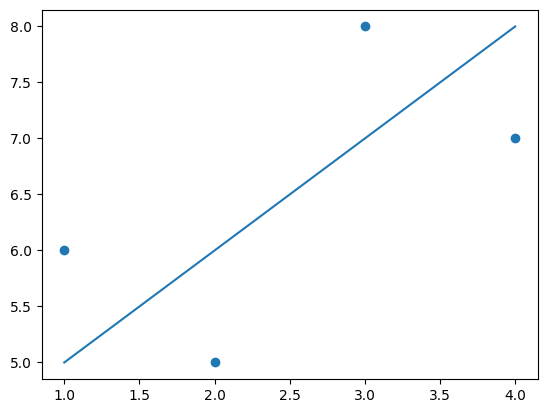

In [57]:
from matplotlib import pyplot as plt  # рекомендуемый способ подключения библиотеки
# при первом вызове функции plt.plot автоматически создаётся фигура, на неё помещаются одни координатные оси
# если создание фигуры / осей нужно специфицировать — напр. сделать нестандартный размер, или несколько графиков на одной фигуре,
# эти функции можно вызвать вручную
plt.plot([1, 2, 3, 4], [5, 6, 7, 8])  # строим график в виде линии
# здесь функциям plot, scatter передаём минимальное количество данных: два списка (могут быть np.array, tuple, и проч.) c координатами x и y
plt.scatter([1, 2, 3, 4], [6, 5, 8, 7])  # строим график в виде несоединенных точек
plt.show()  # необходимо вызвать для показа фигуры

как построить произвольную функцию:

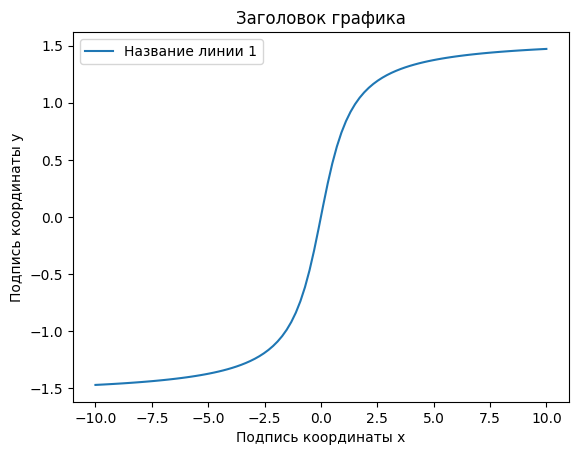

In [72]:
from matplotlib import pyplot as plt
import numpy as np
xs = np.linspace(-10, 10, 100)  # создаём одномерный numpy.ndarray c x-координатами в виде 100 точек равномерно распределённых от -10 до 10
ys = np.arctan(xs)  # вычисляем y-координаты, хотим построить функцию арктангенс
plt.plot(xs, ys, label='Название линии 1')  # строим график, label='Название линии 1' позволяет позже создать легенду графика
plt.xlabel('Подпись координаты x')  # делаем подписи осей, название графика
plt.ylabel('Подпись координаты y')
plt.title('Заголовок графика')
plt.legend()  # создаём легенду
plt.show()

можно задавать вид линии (`linestyle`) и обозначения точек (`marker`). 
Их можно комбинировать между собой произвольным образом.

- [Полный список маркеров](https://matplotlib.org/stable/api/markers_api.html)
- [Полный список стилей линий](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

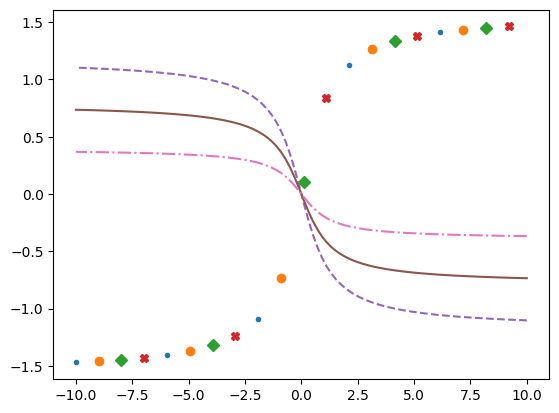

In [98]:
from matplotlib import pyplot as plt
import numpy as np
xs = np.linspace(-10, 10, 100)
ys = np.arctan(xs)
plt.plot(xs[::20], ys[::20], marker='.', linestyle='')
plt.plot(xs[5::20], ys[5::20], marker='o', linestyle='')
plt.plot(xs[10::20], ys[10::20], marker='D', linestyle='')
plt.plot(xs[15::20], ys[15::20], marker='X', linestyle='')
plt.plot(-xs, 3 * ys/4, marker='', linestyle='--')
plt.plot(-xs, ys/2, marker='', linestyle='-')
plt.plot(-xs, ys/4, marker='', linestyle='-.')
plt.show()

Возможности стилизации графиков ограничены только вашей фантазией.
<div>
<img src="img/imagination.jpg" width="500"/>
</div>